## EOSC 453 - Assignment 1 
Claire Parrott, Vanessa Yau

Code Algorithim: 
1. import everything, initialize variables
2. find k values from steady state solution given initial flux conditions
3. use k values to plot timeseries when adding a source (emissions)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
from Initialize import * ## contains initial values
from Functions import * ## imports all functions stored in a .py file

## in Initialize.py ask if the net flux values initally given sum to 0 to ensure a steady state solution

Thinking if we use the same code to plot everything we can keep it clean by creating functions to do this

## 4 box model results, CO2 in air and ocean with 2 integration methods, RK4 and odeint

In [24]:
## Solving the coupled ODEs with and without forcing, with RK4 method and ODEint
time_step = 1e-2 # TODO figure out if max_step is needed
Mforced_4 = sci.solve_ivp(MassFlux, t, M0_4, method="RK45", vectorized = True, args=(1,1)) #t first bc Mass flux function needs t first for rk4 func.
Msteady_4 = sci.solve_ivp(MassFlux, t, M0_4, method="RK45", vectorized = True, args=(0,0))

# RK4 # TODO use old forced and steady equations to make this work?
# [trk, Mrk] = rk4(MassFlux, t_start, t_end, M0_4, 1000) 
# [trkss, Mrkss] = rk4(MassFlux, t_start, t_end, M0_4, 1000) 
# Mrk_real = np.real(Mrk) ## Take the real values only (I doubt there)
# Mrkss_real = np.real(Mrkss) ## Take the real values only (I doubt there)


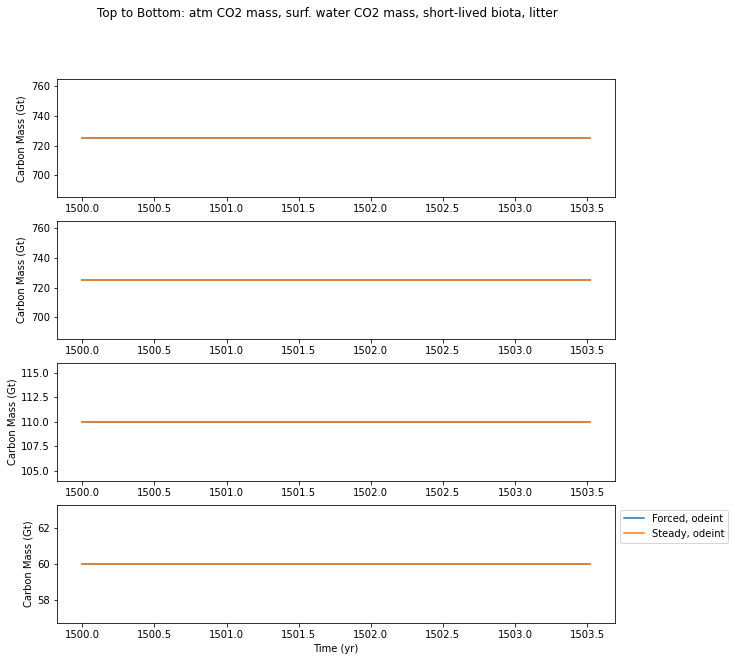

In [25]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Top to Bottom: atm CO2 mass, surf. water CO2 mass, short-lived biota, litter')

for i in range(1, 5):
    box_num = i-1
    plt.subplot(4,1,i)
    plt.plot(Mforced_4.t, Mforced_4.y[box_num, :], label = 'Forced, odeint')
    plt.plot(Msteady_4.t, Msteady_4.y[box_num, :], label = 'Steady, odeint')
    # plt.plot(t, Mforced[:, box_num], label = 'Forced, odeint')
    # plt.plot(t, Msteady[:, box_num], label = 'Steady, odeint')
    # plt.plot(trk, Mrk_real[:, box_num], label = 'forced, rk4')
    # plt.plot(trk, Mrkss_real[:, box_num], label = 'steady, rk4')
    plt.ylabel("Carbon Mass (Gt)")
    #plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

4 box model with 0 emissions at 2110. Emissions cause inc in CO2 in both boxes but once stopped a new steady state is reached. This makes sense (math) because only emissions were added, need more sinks/added sinking mechanism to draw out CO2 from atmosphere. 

## 9 Box Model 
Use RK45, RK23 and DOP853 methods of integration and compare

In [26]:
## Question 1: plot box 1 and 2 using odeint
#del Mforced, Msteady, Mrk_real, Mrkss_real 
t = (1800, 2200) # want 1800-2200 time interval
t_start = 1500; t_end= 2200; n = 1000
#t = np.linspace(t_start, t_end, n) # some time span
## Solving the coupled ODEs with and without forcing, with RK4 method and ODEint
Mforced = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(1, 1)) #max_step=20, args=(1, 1)) ## t first bc Mass flux function needs t first for rk4 func.
Msteady = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(0, 0)) #max_step=20, args=(0, 0))


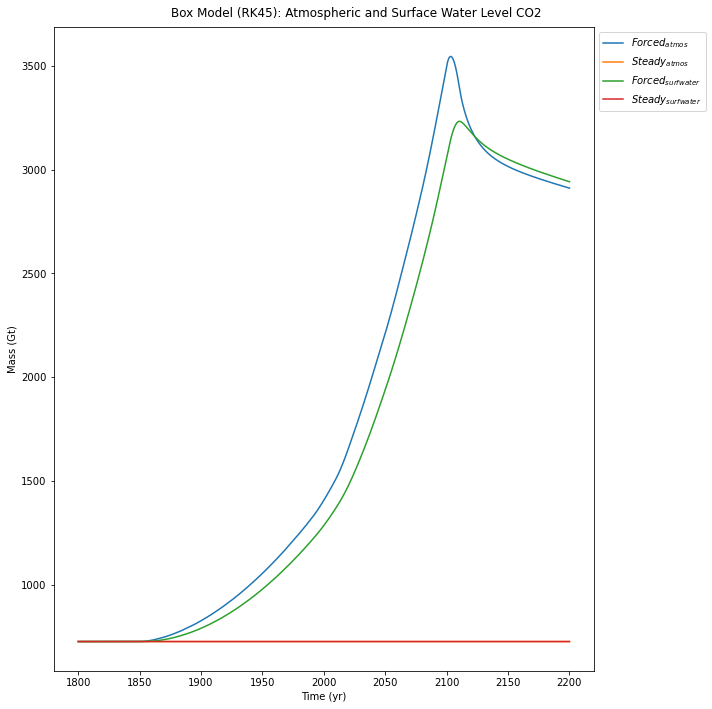

In [27]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Box Model (RK45): Atmospheric and Surface Water Level CO2')

for i in range(1, 3):
    box_num = i-1
    # plt.subplot(2,1,i)
    plt.plot(Mforced.t, Mforced.y[box_num, :])
    plt.plot(Msteady.t, Msteady.y[box_num, :])
    #plt.plot(trk, Mrk_real[:, box_num], label = 'forced, rk4')
    #plt.plot(trk, Mrkss_real[:, box_num], label = 'steady, rk4')
    #plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.ylabel("Mass (Gt)")
plt.legend(('$Forced_{atmos}$', '$Steady_{atmos}$', '$Forced_{surfwater}$', '$Steady_{surfwater}$'), bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig("9box_q1.png")
plt.show()


In [28]:
## Different ODE methods using the emissions forcing 
#del Mforced, Msteady, Mrk_real, Mrkss_real 
t = (1800, 2200) # T-span
time_step = 1e-2

## Solving the coupled ODEs with different ODE methods using the emissions forcing
MRK45 = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(1, 1)) ## t first bc Mass flux function needs t first for rk4 func.
MRK23 = sci.solve_ivp(MassFlux, t, M0_9, method="RK23", vectorized = True, args=(1, 1))
MDOP853 = sci.solve_ivp(MassFlux, t, M0_9, method="DOP853", vectorized = True, args=(1, 1))


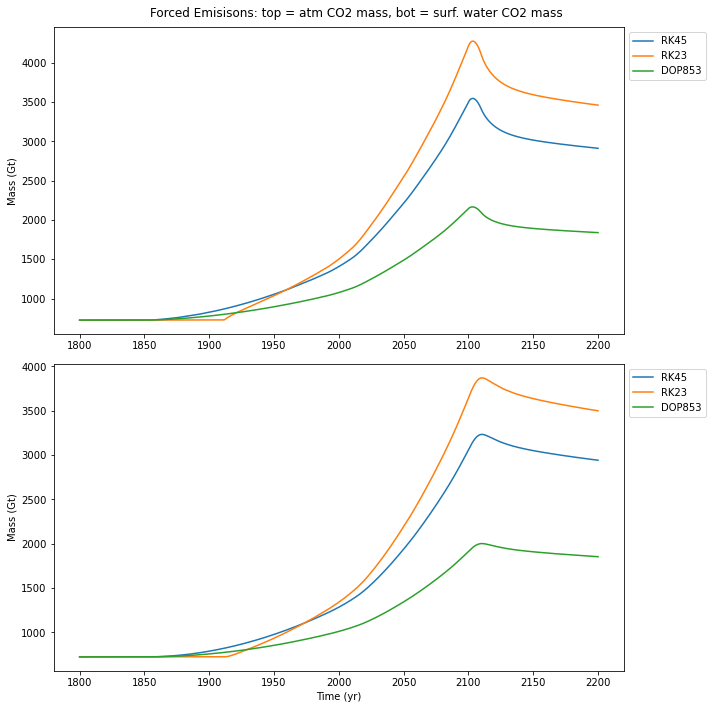

In [29]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Forced Emisisons: top = atm CO2 mass, bot = surf. water CO2 mass')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(MRK45.t, MRK45.y[box_num, :])
    plt.plot(MRK23.t, MRK23.y[box_num, :])
    plt.plot(MDOP853.t, MDOP853.y[box_num, :])
    plt.legend(('RK45', 'RK23', 'DOP853'), bbox_to_anchor=(1,1), loc="upper left")
    plt.ylabel("Mass (Gt)")
    #plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.tight_layout()
plt.savefig("9box_q1_diffODEmethods.png")
plt.show()

In [30]:
## Question 2: modify emissions to maintain 2000AD value indefinetly, plot box 1 and 2
Mforced = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(2, 2)) ## t first bc Mass flux function needs t first for rk4 func.
Msteady = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(0, 0))

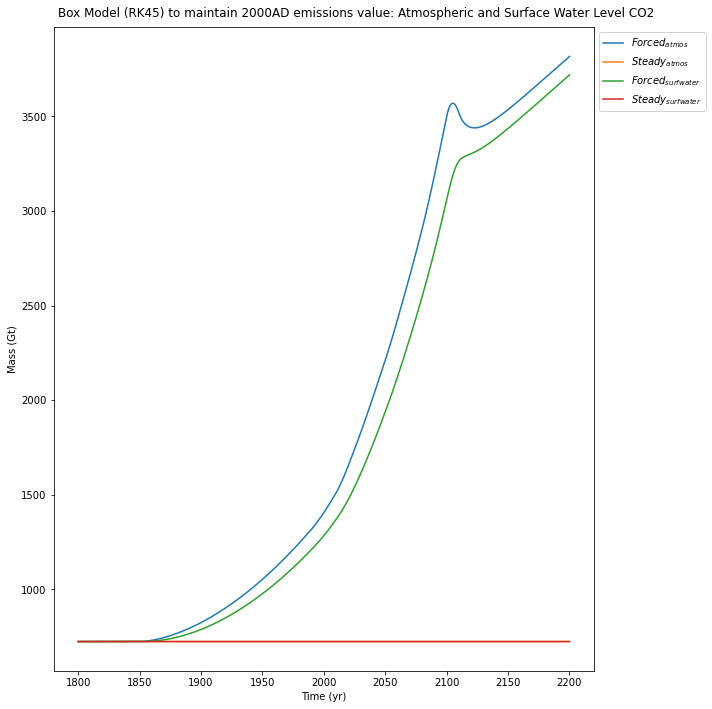

In [31]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Box Model (RK45) to maintain 2000AD emissions value: Atmospheric and Surface Water Level CO2')

for i in range(1, 3):
    box_num = i-1
    # plt.subplot(2,1,i)
    plt.plot(Mforced.t, Mforced.y[box_num, :], label = 'Forced, odeint')
    plt.plot(Msteady.t, Msteady.y[box_num, :], label = 'Steady, odeint')
    #plt.plot(trk, Mrk_real[:, box_num], label = 'forced, rk4')
    #plt.plot(trk, Mrkss_real[:, box_num], label = 'steady, rk4')
    #plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.ylabel("Mass (Gt)")
plt.legend(('$Forced_{atmos}$', '$Steady_{atmos}$', '$Forced_{surfwater}$', '$Steady_{surfwater}$'), bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig('9boxmodel_q2.png')
plt.show()

In [32]:
## Question 3: modify emissions to investigate periodic and decaying periodic CO2 forcing
#removing max_step from 2nd last argument for now
Mforced_periodic = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(3, 3))
Mforced_decay = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(4, 4))
Msteady = sci.solve_ivp(MassFlux, t, M0_9, method="RK45", vectorized = True, args=(0, 0))

/Users/Vanessa/Desktop/EOSC453/Assignment1/Functions.py:102: RuntimeWarning: overflow encountered in exp
  M[0] += np.exp((2*np.pi)*period*t)
/opt/anaconda3/envs/env_eosc410/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:103: RuntimeWarning: invalid value encountered in true_divide
  d0 = norm(y0 / scale)
/Users/Vanessa/Desktop/EOSC453/Assignment1/Functions.py:90: RuntimeWarning: invalid value encountered in matmul
  dMdt = np.matmul(k, M)
/opt/anaconda3/envs/env_eosc410/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:112: RuntimeWarning: invalid value encountered in true_divide
  d2 = norm((f1 - f0) / scale) / h0
/opt/anaconda3/envs/env_eosc410/lib/python3.9/site-packages/scipy/integrate/_ivp/rk.py:64: RuntimeWarning: invalid value encountered in add
  K[s] = fun(t + c * h, y + dy)


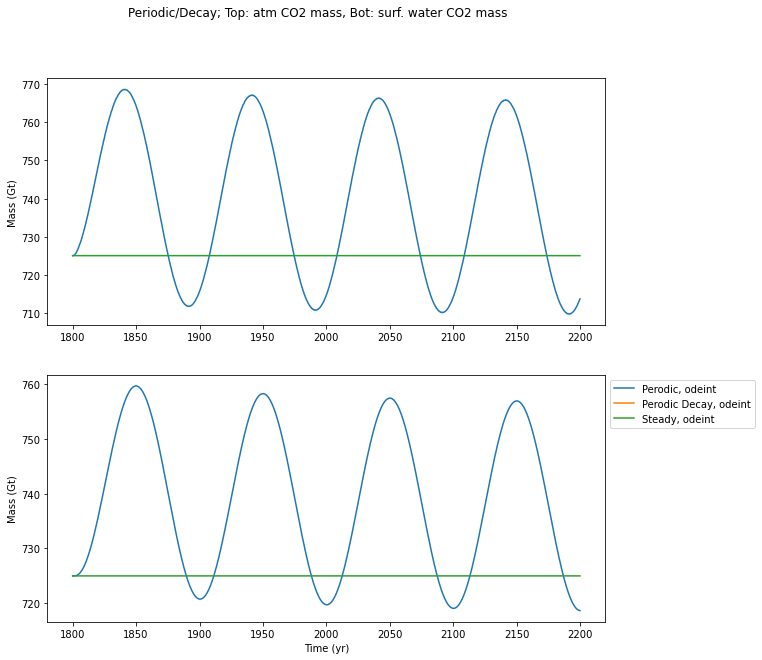

In [33]:
## PLOTTING
plt.figure(figsize = [10, 10])
plt.suptitle('Periodic/Decay; Top: atm CO2 mass, Bot: surf. water CO2 mass')

for i in range(1, 3):
    box_num = i-1
    plt.subplot(2,1,i)
    plt.plot(Mforced_periodic.t, Mforced_periodic.y[box_num, :], label = 'Perodic, odeint')
    plt.plot(Mforced_decay.t, Mforced_decay.y[box_num, :], label = 'Perodic Decay, odeint')
    plt.plot(Msteady.t, Msteady.y[box_num, :], label = 'Steady, odeint')
    #plt.plot(trk, Mrk_real[:, box_num], label = 'forced, rk4')
    #plt.plot(trk, Mrkss_real[:, box_num], label = 'steady, rk4')
    plt.ylabel("Mass (Gt)")
    #plt.xlim([1800, t[-1]])
    #plt.ylim([0,1500])

plt.xlabel('Time (yr)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()